# **ML Case Study**

## **Project** : **Social Media Text Sentiment Analysis**


# Define Problem Statement

# 1. Define the Problem Statement.

### Industry Understanding:

* Type of Problem: Conducting Sentiment Analysis on social media texts using **Natural Language Processing (NLP)** techniques.

### Business Objectives:

* Purpose: To classify social media text into positive, negative, or neutral sentiments.
* Outcome: Achieve accurate sentiment prediction for understanding user opinions effectively.

### Constraints & Limitations:

* Computational Power: Limited resources for model training and inference.
* Budget: Cost considerations for cloud services or external tools.
* Data Availability: Quality and availability of diverse social media text data.
* Obstacles: Handling diverse language styles and informal text.

### Evaluation Metrics:

* Optimization: Maximizing accuracy and precision in sentiment prediction.
* KPIs Tracking: Monitoring model performance using precision, recall, and F1 score.
* Required Testing: Rigorous testing for robustness across various text inputs.

### Relevance to Target Audience:

* Usage: Real-time sentiment analysis for quick insights into user sentiments.

### Data Availability:

* Collection: Access to a diverse dataset of social media text.
* Features: Identifying key features for effective sentiment analysis.

### Scope of Solution:

* Capabilities: Develop a robust NLP model for accurate sentiment prediction.
* Scalability: Potential for future scalability to handle larger datasets and nuanced sentiment categories.

### Deployment Considerations:

* Cloud Platform: Explore deployment on a cloud platform for scalability.
* Integration: Options for integrating sentiment analysis into a web application or website.
* API Deployment: Potential deployment as an API for easy integration into various platforms.

By addressing these aspects, the project aims to develop an effective solution for sentiment analysis on social media texts, considering practical constraints and deployment scenarios.

# Data collection

### **Importing Libraries**

In [ ]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from nltk.stem import PorterStemmer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import numpy as np
import string

### **Loading Dataset**

In [ ]:
df=pd.read_csv('social_text.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  732 non-null    int64 
 1   Unnamed: 0    732 non-null    int64 
 2   Text          732 non-null    object
 3   Sentiment     732 non-null    object
dtypes: int64(2), object(2)
memory usage: 23.0+ KB


### **First 5 rows of Dataset**

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment
0,0,0,Enjoying a beautiful day at the park! ...,Positive
1,1,1,Traffic was terrible this morning. ...,Negative
2,2,2,Just finished an amazing workout! 💪 ...,Positive
3,3,3,Excited about the upcoming weekend getaway! ...,Positive
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral


# Data Preprocessing

In [ ]:
# Dropping irrelavent columns
df.drop(columns=['Unnamed: 0.1'], inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# Downloading NLTK resources (stopwords and punkt tokenizer)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df.head(50)

,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Positive
1,Traffic was terrible this morning. ...,Negative
2,Just finished an amazing workout! 💪 ...,Positive
3,Excited about the upcoming weekend getaway! ...,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral
5,Feeling grateful for the little things in lif...,Positive
6,Rainy days call for cozy blankets and hot coc...,Positive
7,The new movie release is a must-watch! ...,Positive
8,Political discussions heating up on the timel...,Negative
9,Missing summer vibes and beach days. ...,Neutral


In [ ]:
# Checking the unique sentiments present in the 'Sentiment' target column
df["Sentiment"].nunique()

279

In [ ]:
# Stripping extra spaces to ensure accurate sentiment count
df['Sentiment'] = df['Sentiment'].map(lambda x: x.strip())

In [ ]:
# Creating copy of Dataframe
cdf=df.copy()

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### **Sentiment Intensity Analyzer to generalize different sentiments present**

In [ ]:
# Create a SentimentIntensityAnalyzer instance
sia = SentimentIntensityAnalyzer()

# Get the sentiment column as a list to use with the SentimentIntensityAnalyzer object.
all_sentiment_words = df['Sentiment'].unique().tolist()

In [ ]:
# Considering the existence of 191 different sentiments, which are essentially synonyms falling under the broader categories of positive, negative, and neutral,
# we aim to generalize them using a Sentiment Intensity Analyzer. This analyzer assigns a polarity score, aiding in classifying words as positive, negative, or neutral.
# Following the analysis, positive words will be placed in the 'pos_words' list, negative words in 'neg_words', and neutral words in 'neu_words'.
# Subsequently, we will replace all occurrences of positive words with the label 'Positive', negative words with 'Negative',
# and neutral words with 'Neutral sentiment', consolidating the sentiments into three distinct categories for improved clarity.

pos_words = [] # List for positive words
neg_words = [] # List for negative words
neu_words = [] # List for neutral words

for word in all_sentiment_words:

    # Get compound score of the word.
    score = sia.polarity_scores(word)['compound']
    if score >= 0.35:
        pos_words.append(word)
    elif score <= -0.35:
        neg_words.append(word)
    else:
        neu_words.append(word)

print(f'Positive words:\n{pos_words}\n\nNegative words:\n{neg_words}\n\nNeutral words:\n{neu_words}\n')
print(f'Pos len: {len(pos_words)}\nNeg len: {len(neg_words)}\nNeu len: {len(neu_words)}')

Positive words:
['Positive', 'Happiness', 'Joy', 'Love', 'Amusement', 'Enjoyment', 'Admiration', 'Affection', 'Acceptance', 'Adoration', 'Calmness', 'Excitement', 'Kind', 'Elation', 'Euphoria', 'Contentment', 'Gratitude', 'Hope', 'Compassion', 'Tenderness', 'Enthusiasm', 'Determination', 'Hopeful', 'Proud', 'Grateful', 'Empathetic', 'Compassionate', 'Playful', 'Inspired', 'Confident', 'Thrill', 'Overjoyed', 'Inspiration', 'Satisfaction', 'Blessed', 'Appreciation', 'Confidence', 'Optimism', 'Elegance', 'Harmony', 'Creativity', 'Coziness', 'Freedom', 'Marvel', 'Positivity', 'Kindness', 'Friendship', 'Success', 'Amazement', 'Romance', 'Tranquility', 'Grandeur', 'Charm', 'Ecstasy', 'Engagement', 'Triumph', 'Heartwarming', 'Sympathy', 'Joy in Baking', 'Thrilling Journey', "Nature's Beauty", 'Creative Inspiration', 'Runway Creativity', "Ocean's Freedom", 'Relief', 'Happy']

Negative words:
['Negative', 'Anger', 'Fear', 'Sadness', 'Disgust', 'Disappointed', 'Bitter', 'Shame', 'Grief', 'Loneli

In [ ]:
# Checking sentiment before
cdf['Sentiment'].nunique()

191

In [ ]:
# Despite categorizing based on polarity scores, some words are misclassified in the neutral category.
# To enhance model accuracy, we are removing certain words from neutral that should be in positive or negative,
# and subsequently, adding them to the positive or negative category.

neg_words_to_move = ['Despair', 'Jealousy', 'Anxiety', 'Envious', 'Darkness', 'Desolation', 'Loss', 'Heartache']

pos_words_to_move = ['Fulfillment', 'Motivation', 'JoyfulReunion', 'Accomplishment', 'Wonderment', 'Enchantment',
                     'PlayfulJoy', 'FestiveJoy', 'Celebration']

# Loop for deleting from negative words(neg_words_to_move) from neutral list
for neg_word in neg_words_to_move:

    # While looping, get the index of the current word and delete it from neutral words list.
    index = neu_words.index(neg_word)
    del neu_words[index]

print(f'Neutral words:\n{neu_words}\n\nNeutral words length: {len(neu_words)}')

Neutral words:
['Neutral', 'Awe', 'Surprise', 'Anticipation', 'Confusion', 'Pride', 'Serenity', 'Empowerment', 'Arousal', 'Fulfillment', 'Reverence', 'Boredom', 'Envy', 'Curiosity', 'Indifference', 'Numbness', 'Nostalgia', 'Ambivalence', 'Zest', 'Free-spirited', 'Yearning', 'Apprehensive', 'Overwhelmed', 'Dismissive', 'Bittersweet', 'Motivation', 'Contemplation', 'JoyfulReunion', 'Reflection', 'Accomplishment', 'Wonderment', 'Enchantment', 'Intrigue', 'PlayfulJoy', 'Mindfulness', 'DreamChaser', 'Whimsy', 'Pensive', 'Radiance', 'Wonder', 'Rejuvenation', 'Adventure', 'Melodic', 'FestiveJoy', 'InnerJourney', 'Dazzle', 'Adrenaline', 'ArtisticBurst', 'CulinaryOdyssey', 'Resilience', 'Immersion', 'Spark', 'EmotionalStorm', 'LostLove', 'Solitude', 'Exploration', 'Captivation', 'Emotion', 'Energy', 'Celebration', 'Colorful', 'Hypnotic', 'Connection', 'Iconic', 'Journey', 'Touched', 'Suspense', 'Pressure', 'Renewed Effort', 'Miscalculation', 'Challenge', 'Solace', 'Breakthrough', 'Envisioning H

In [ ]:
# Same process for positive words that are in the neu_words list
for pos_word in pos_words_to_move:
    index = neu_words.index(pos_word)
    del neu_words[index]

# Notice how the neu_words list gets smaller by the amount of words in both pos/neg_words_to_remove,to confirm things are working fine.
print(f'Neutral words:\n{neu_words}\n\nNeutral words length: {len(neu_words)}')

Neutral words:
['Neutral', 'Awe', 'Surprise', 'Anticipation', 'Confusion', 'Pride', 'Serenity', 'Empowerment', 'Arousal', 'Reverence', 'Boredom', 'Envy', 'Curiosity', 'Indifference', 'Numbness', 'Nostalgia', 'Ambivalence', 'Zest', 'Free-spirited', 'Yearning', 'Apprehensive', 'Overwhelmed', 'Dismissive', 'Bittersweet', 'Contemplation', 'Reflection', 'Intrigue', 'Mindfulness', 'DreamChaser', 'Whimsy', 'Pensive', 'Radiance', 'Wonder', 'Rejuvenation', 'Adventure', 'Melodic', 'InnerJourney', 'Dazzle', 'Adrenaline', 'ArtisticBurst', 'CulinaryOdyssey', 'Resilience', 'Immersion', 'Spark', 'EmotionalStorm', 'LostLove', 'Solitude', 'Exploration', 'Captivation', 'Emotion', 'Energy', 'Colorful', 'Hypnotic', 'Connection', 'Iconic', 'Journey', 'Touched', 'Suspense', 'Pressure', 'Renewed Effort', 'Miscalculation', 'Challenge', 'Solace', 'Breakthrough', 'Envisioning History', 'Imagination', 'Vibrancy', 'Mesmerizing', 'Culinary Adventure', 'Winter Magic', 'Celestial Wonder', 'Whispers of the Past', 'Mi

In [ ]:
# Adding these pos and neg words to their appropriate pos_words and neg_words lists.
for word in pos_words_to_move:
    pos_words.append(word)

for word in neg_words_to_move:
    neg_words.append(word)

print(f'Positive words:\n{pos_words}\nPositive words length: {len(pos_words)}\n\n')
print(f'Negative words:\n{neg_words}\nNegative words length: {len(neg_words)}')

Positive words:
['Positive', 'Happiness', 'Joy', 'Love', 'Amusement', 'Enjoyment', 'Admiration', 'Affection', 'Acceptance', 'Adoration', 'Calmness', 'Excitement', 'Kind', 'Elation', 'Euphoria', 'Contentment', 'Gratitude', 'Hope', 'Compassion', 'Tenderness', 'Enthusiasm', 'Determination', 'Hopeful', 'Proud', 'Grateful', 'Empathetic', 'Compassionate', 'Playful', 'Inspired', 'Confident', 'Thrill', 'Overjoyed', 'Inspiration', 'Satisfaction', 'Blessed', 'Appreciation', 'Confidence', 'Optimism', 'Elegance', 'Harmony', 'Creativity', 'Coziness', 'Freedom', 'Marvel', 'Positivity', 'Kindness', 'Friendship', 'Success', 'Amazement', 'Romance', 'Tranquility', 'Grandeur', 'Charm', 'Ecstasy', 'Engagement', 'Triumph', 'Heartwarming', 'Sympathy', 'Joy in Baking', 'Thrilling Journey', "Nature's Beauty", 'Creative Inspiration', 'Runway Creativity', "Ocean's Freedom", 'Relief', 'Happy', 'Fulfillment', 'Motivation', 'JoyfulReunion', 'Accomplishment', 'Wonderment', 'Enchantment', 'PlayfulJoy', 'FestiveJoy',

In [ ]:
# Substituting pos_words with 'Positive', neg_words with 'Negative', and neu_words with 'Neutral' values in the 'Sentiment' target variable in the copied DataFrame cdf.

cdf['Sentiment'] = cdf['Sentiment'].map(lambda x: "Positive" if x in pos_words else x)
cdf['Sentiment'] = cdf['Sentiment'].map(lambda x: "Negative" if x in neg_words else x)
cdf['Sentiment'] = cdf['Sentiment'].map(lambda x: "Neutral" if x in neu_words else x)

### **Tokenization**

In [ ]:
# Tokenization

def clean_text(text):
    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert text to lowercase
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove extra whitespaces
    text = re.sub(' +', ' ', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Reassemble the tokens into a single string
    text = ' '.join(tokens)


    return text

cdf['Processed_Text'] = cdf['Text'].apply(clean_text)

### **Vectorization**

In [ ]:
# Vectorization

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents
X = tfidf_vectorizer.fit_transform(cdf['Processed_Text'])


In [ ]:
# Pritning  Vectorization Features

feature_names = tfidf_vectorizer.get_feature_names_out()
print("Feature Names:", feature_names)


Feature Names: ['ablaz' 'abstract' 'abyss' ... 'zen' 'zero' 'zest']


# Data Visualization

### **Top 20 most occuring words frequency**

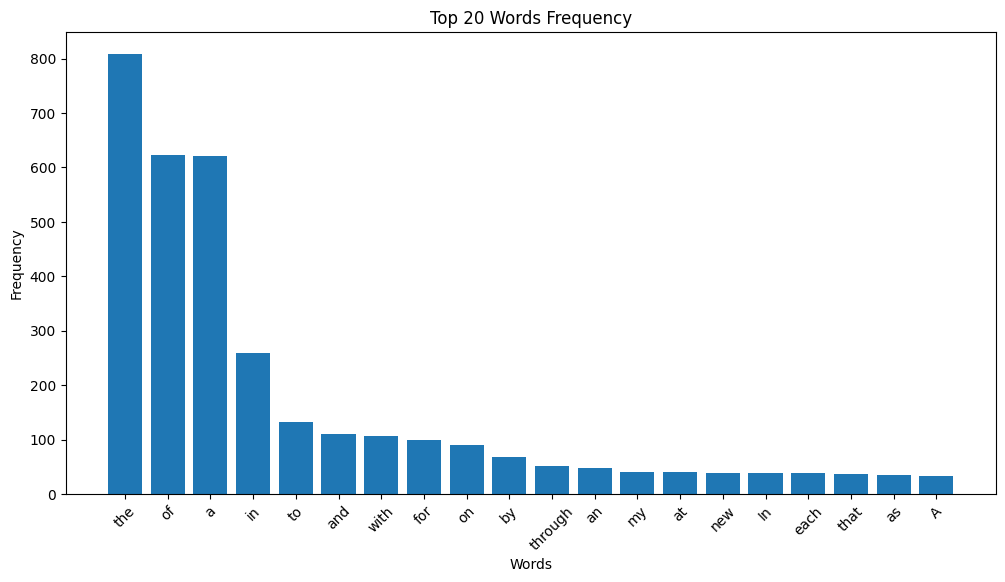

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

text_data = df['Text'].astype(str)

# Tokenize the text into words
words = ' '.join(text_data).split()

# Calculate word frequencies
word_freq = Counter(words)

# Create a DataFrame for visualization
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

# Sort by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the top 20 words
top_n = 20
plt.figure(figsize=(12, 6))
plt.bar(word_freq_df['Word'][:top_n], word_freq_df['Frequency'][:top_n])
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Words Frequency'.format(top_n))
plt.show()


### **Top 20 Bigrams Frequency using Bar Graph**
* To gain insights into which word pairs are most common or occur together frequently in the text data.

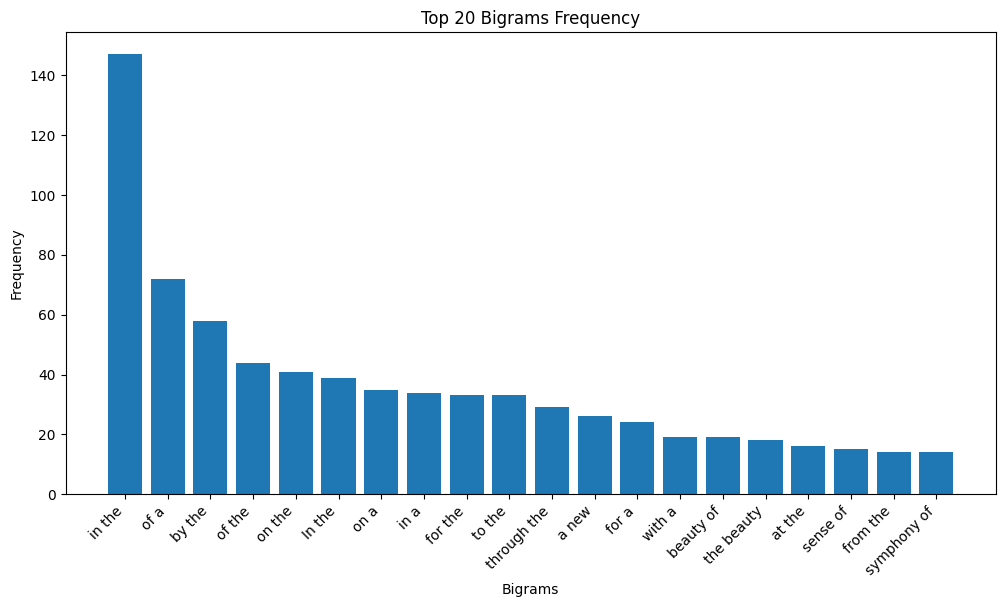

In [ ]:
from nltk import ngrams

text_data = df['Text'].astype(str)

# Tokenize the text into words
words = ' '.join(text_data).split()

# Generate bigrams
bigrams = ngrams(words, 2)

# Calculate bigram frequencies
bigram_freq = Counter(bigrams)

# Create a DataFrame for visualization
bigram_freq_df = pd.DataFrame(bigram_freq.items(), columns=['Bigram', 'Frequency'])

# Sort by frequency in descending order
bigram_freq_df = bigram_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the top 20 bigrams
top_n = 20
bigram_labels = [' '.join(map(str, bigram)) for bigram in bigram_freq_df['Bigram'][:top_n]]

plt.figure(figsize=(12, 6))
plt.bar(bigram_labels, bigram_freq_df['Frequency'][:top_n])
plt.xticks(rotation=45, ha="right")
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top {} Bigrams Frequency'.format(top_n))
plt.show()


### **WordCloud**

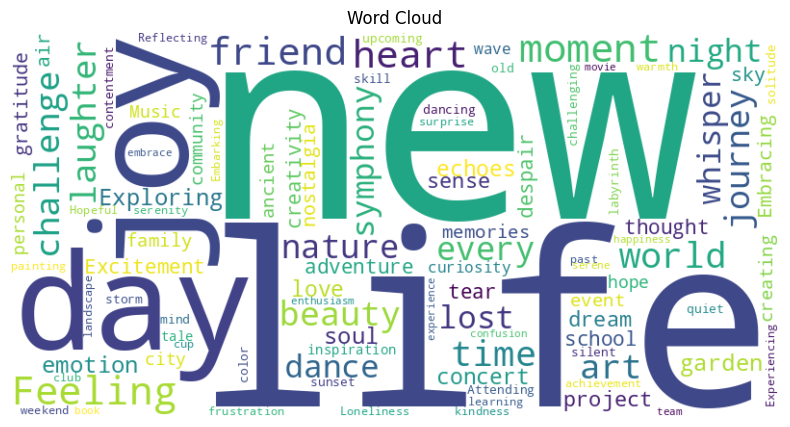

In [ ]:
from wordcloud import WordCloud

text_data = ' '.join(df['Text'].astype(str))

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=42, max_words=100, background_color='white').generate(text_data)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


# Model Prediction

In [ ]:
# Assigning the 'Sentiment' column as the target variable y
y=cdf['Sentiment']
y


0      Positive
1      Negative
2      Positive
3      Positive
4       Neutral
         ...   
727    Positive
728    Positive
729    Positive
730    Positive
731    Positive
Name: Sentiment, Length: 732, dtype: object

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Oversampling using SMOTE , then used Random Forest Classifier**

In [ ]:
# Oversampling using SMOTE , then used Random Forest Classifier

# Create the SMOTE oversampler
smote = SMOTE(random_state=42)

# Fit and transform the training data using SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Using Random Forest Classifier Model
model = RandomForestClassifier(n_estimators=150, class_weight='balanced',random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', n_estimators=150,
                       random_state=42)

### **Prediction using testing data**

In [ ]:
#  Prediction using testing dataset
y_pred = model.predict(X_test)

# Comparing predicted values of the model when we pass testing values with the actual
# testing y values
print('Testing Sentiment Values: \n',y_test[20:50])
print('Model Predicted Values using X_test: \n' ,y_pred[20:50])



Testing Sentiment Values: 
 607    Positive
416     Neutral
468    Negative
65      Neutral
54     Negative
235     Neutral
81     Positive
499     Neutral
405    Positive
718    Positive
344    Positive
286    Positive
473    Positive
593    Negative
722    Positive
449     Neutral
602    Positive
575     Neutral
326    Negative
10     Positive
109    Positive
431     Neutral
579     Neutral
155     Neutral
411    Positive
340     Neutral
198     Neutral
526     Neutral
514     Neutral
450    Negative
Name: Sentiment, dtype: object
Model Predicted Values using X_test: 
 ['Positive' 'Positive' 'Negative' 'Positive' 'Positive' 'Neutral'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Negative' 'Positive' 'Neutral'
 'Negative' 'Positive' 'Positive' 'Negative' 'Positive' 'Positive'
 'Positive' 'Positive' 'Neutral' 'Positive' 'Positive' 'Positive']


### **Model Prediction on new Sentense**

In [ ]:
# Model Prediction on new Sentense

new_sentence = "It tastes so bitter"
processed_sentence = clean_text(new_sentence) # processing new_sentense using our function clean_text
vectorized_sentence = tfidf_vectorizer.transform([processed_sentence]) # vectorizing

# Make predictions
prediction = model.predict(vectorized_sentence)

print("Processed Sentence:", processed_sentence)
print("Predicted Class:", prediction)

Processed Sentence: tast bitter
Predicted Class: ['Negative']


### **Confusion matrix**

In [ ]:
# Drawing Confusion matrix for checking our model accuracy

conf_matrix = confusion_matrix(y_test, y_pred)

# Display the Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[23  0 14]
 [ 6 15 25]
 [ 0  0 64]]


### **Precision and Recall**

In [ ]:
# Using precision , recall to check Accuracy

precision_positive = precision_score(y_test, y_pred, labels=[0], average='weighted', zero_division=1)
recall_positive = recall_score(y_test, y_pred, labels=[0], average='weighted', zero_division=1)

precision_negative = precision_score(y_test, y_pred, labels=[1], average='weighted', zero_division=1)
recall_negative = recall_score(y_test, y_pred, labels=[1], average='weighted', zero_division=1)

precision_neutral = precision_score(y_test, y_pred, labels=[2], average='weighted', zero_division=1)
recall_neutral = recall_score(y_test, y_pred, labels=[2], average='weighted', zero_division=1)

print(f"Precision for Class 0 (Positive): {precision_positive:.4f}")
print(f"Recall for Class 0 (Positive): {recall_positive:.4f}\n")

print(f"Precision for Class 1 (Negative): {precision_negative:.4f}")
print(f"Recall for Class 1 (Negative): {recall_negative:.4f}\n")

print(f"Precision for Class 2 (Neutral): {precision_neutral:.4f}")
print(f"Recall for Class 2 (Neutral): {recall_neutral:.4f}")



Precision for Class 0 (Positive): 1.0000
Recall for Class 0 (Positive): 1.0000

Precision for Class 1 (Negative): 1.0000
Recall for Class 1 (Negative): 1.0000

Precision for Class 2 (Neutral): 1.0000
Recall for Class 2 (Neutral): 1.0000


### **Cross-Validation**

In [ ]:
# Using cross-validation as well for checking our model accuracy

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# Display the accuracy scores
print("Cross-Validation Accuracy Scores:", scores)

# Mean Accuracy score
print("Mean Accuracy:", np.mean(scores))

Cross-Validation Accuracy Scores: [0.70068027 0.7414966  0.69863014 0.7260274  0.69863014]
Mean Accuracy: 0.7130929083962353


### **Accuracy Score**

In [ ]:
# Final testing using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.6938775510204082


## **Conclusion :**

### The obtained accuracy of **0.69** is promising given the limited dataset.
### However, with additional data, the model's performance is likely to improve significantly.
### Despite the data constraints, various sampling techniques and checks were applied
### to enhance the accuracy, demonstrating the model's potential.